<a href="https://colab.research.google.com/github/TailUFPB/fundos-imobiliarios/blob/main/FII_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Introdução
Este notebook tem como finalidade realizar a Análise Exploratória de Dados dos fundos imobiliários listados na bolsa de valores brasileira, a B3.

A análise está dividida em três etapas:

1.   Análise de uma base contendo os dados de FIIs (Fundos de Investimento Imobiliários) em 2022 e em 2019
2.   Comparação entre as FIIs de 2022 vs 2019

Para as duas bases de dados, utilizaremos as mesmas técnicas e representações para a visualização dos dados, de forma que seja estabelecida um padrão analítico único.

Essas serão as análises realizadas:

*   Análise de dados categóricos
*   Análise de uma variável
*   Análise multivariável
*   Análise comparativa e variancias





In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url = 'https://raw.githubusercontent.com/lazs/tcc_pucmg/main/FIIs-2022.csv'
data = pd.read_csv(url, encoding = "ISO-8859-1", decimal = ",", thousands="." , on_bad_lines="skip", sep=";")
df = pd.DataFrame(data)
df.head()

,Código do fundo,Setor,Preço Atual,Liquidez Diária,Dividendo,DividendYield,DY (3M)Acumulado,DY (6M)Acumulado,DY (12M)Acumulado,DY (3M)Média,...,PatrimônioLíq.,VPA,P/VPA,DYPatrimonial,Rentab. Patr.no Período,Rentab. Patr.Acumulada,VacânciaFísica,VacânciaFinanceira,QuantidadeAtivos,VariaçãoPatrimonial
0,AFHI11,Títulos e Val. Mob.,98.55,9820,1.35,1.31,3.85,7.64,0.00,1.28,...,1.738249e+08,97.24,1.01,1.39,1.83,3.20,0.0,0.0,0,0.44
1,AFOF11,Títulos e Val. Mob.,89.22,1511,1.01,1.07,3.21,6.26,0.00,1.07,...,7.072136e+07,102.32,0.87,0.98,2.25,5.57,0.0,0.0,0,1.26
2,ARRI11,Títulos e Val. Mob.,95.22,1294,1.28,1.30,3.94,8.59,15.68,1.31,...,9.866189e+07,94.11,1.01,1.42,3.58,6.18,0.0,0.0,0,2.12
3,BARI11,Títulos e Val. Mob.,100.00,6416,1.30,1.27,3.41,6.94,13.27,1.14,...,4.726223e+08,101.99,0.98,1.08,1.45,3.74,0.0,0.0,0,0.37
4,BBFO11,Títulos e Val. Mob.,71.39,3143,0.77,1.05,3.03,5.96,10.31,1.01,...,3.431596e+08,85.71,0.83,0.90,1.18,2.46,0.0,0.0,0,0.28


In [ ]:
#df = df.replace(',','.', regex=True)

In [ ]:
df['Preço Atual'] = df['Preço Atual'].astype(float)

In [ ]:
#df = df.apply(pd.to_numeric, errors='ignore')

In [ ]:
#df['Preço Atual'] = df['Preço Atual'].str.replace(',', '.').astype(float)

In [ ]:
df.set_index('Código do fundo', inplace = True)

In [ ]:
del df['DY (3M)Acumulado']      
del df['DY (6M)Acumulado']         
del df['DY (12M)Acumulado']                  
del df['DYPatrimonial']              
del df['Rentab. Patr.no Período']
del df['Rentab. Patr.Acumulada']
del df['VacânciaFinanceira'] 
del df['VariaçãoPatrimonial']        

In [ ]:
#Impondo um limite de análise de NO MÍNIMO 1000 negociações dárias
df = df[df['Liquidez Diária'] >= 1000]

In [ ]:
df.dtypes

Setor                object
Preço Atual         float64
Liquidez Diária       int64
Dividendo           float64
DividendYield       float64
DY (3M)Média        float64
DY (6M)Média        float64
DY (12M)Média       float64
DY Ano              float64
Variação Preço      float64
Rentab.Período      float64
Rentab.Acumulada    float64
PatrimônioLíq.      float64
VPA                 float64
P/VPA               float64
VacânciaFísica      float64
QuantidadeAtivos      int64
dtype: object

##Dados Categoricos

O único dado categórico presente na tabela é de Setor, portanto, faremos apenas a análise categórica deste.

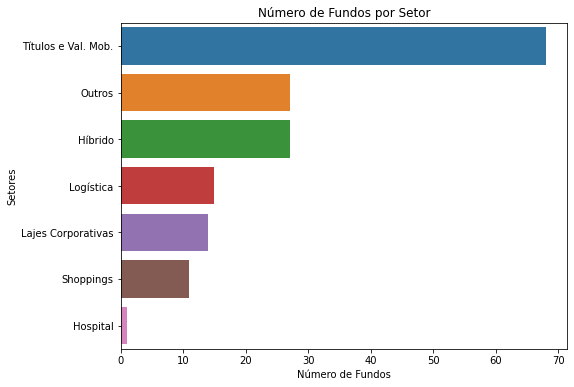

In [ ]:
plt.figure(figsize = (8,6))
ax = sns.countplot(y='Setor', 
              data = df, 
              order = df.Setor.value_counts(ascending = False).index)

ax.set_title('Número de Fundos por Setor')
plt.xlabel('Número de Fundos')
plt.ylabel('Setores')
plt.show()

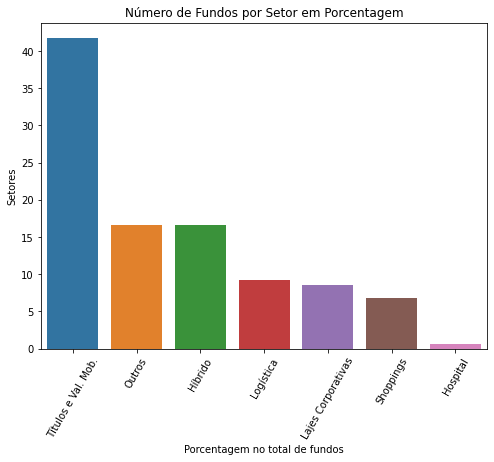

In [ ]:
setor_norm = df.Setor.value_counts(normalize = True)

plt.figure(figsize = (8,6))
ax = sns.barplot(x = setor_norm.index,
                   y = setor_norm.values * 100)

ax.set_title('Número de Fundos por Setor em Porcentagem')
plt.xlabel('Porcentagem no total de fundos')
plt.ylabel('Setores')
plt.xticks(rotation = 60)
plt.show()

##Variáveis Numéricas

Nesta etapa, analisaremos (por meio de boxplots, violinplots e histogramas) as variáveis individualmente, com isto, podemos criar uma ideia inicial dos dados tratados para análises mais específicas e/ou complexas.

In [ ]:
df.describe()

,Preço Atual,Liquidez Diária,Dividendo,DividendYield,DY (3M)Média,DY (6M)Média,DY (12M)Média,DY Ano,Variação Preço,Rentab.Período,Rentab.Acumulada,PatrimônioLíq.,VPA,P/VPA,VacânciaFísica,QuantidadeAtivos
count,163.000000,1.630000e+02,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,1.630000e+02,163.000000,163.000000,163.000000,163.000000
mean,81.587546,3.272537e+04,0.839387,0.979877,0.918221,0.856626,0.694969,3.510184,0.450368,1.433681,2.028650,7.659032e+08,94.173926,0.862945,4.284601,4.190184
std,43.573843,1.140006e+05,0.481560,0.329258,0.327553,0.361687,0.396955,1.182890,3.509626,3.537069,6.258937,9.304824e+08,45.797844,0.195097,12.669723,9.593949
min,2.010000,1.001000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-13.440000,-12.720000,-28.710000,1.890990e+07,6.980000,0.080000,0.000000,0.000000
25%,68.730000,3.124000e+03,0.600000,0.745000,0.725000,0.700000,0.560000,2.790000,-1.140000,-0.215000,-0.960000,2.035259e+08,87.490000,0.795000,0.000000,0.000000
50%,90.020000,8.504000e+03,0.770000,0.950000,0.930000,0.880000,0.760000,3.570000,0.440000,1.300000,2.440000,3.901729e+08,97.520000,0.900000,0.000000,0.000000
75%,99.990000,2.508300e+04,1.190000,1.200000,1.165000,1.115000,0.955000,4.395000,2.470000,3.505000,5.705000,1.008172e+09,102.950000,1.010000,0.000000,4.500000
max,427.500000,1.315055e+06,3.300000,1.740000,1.600000,1.520000,1.530000,6.040000,10.430000,11.160000,20.180000,6.947212e+09,456.770000,1.360000,100.000000,72.000000


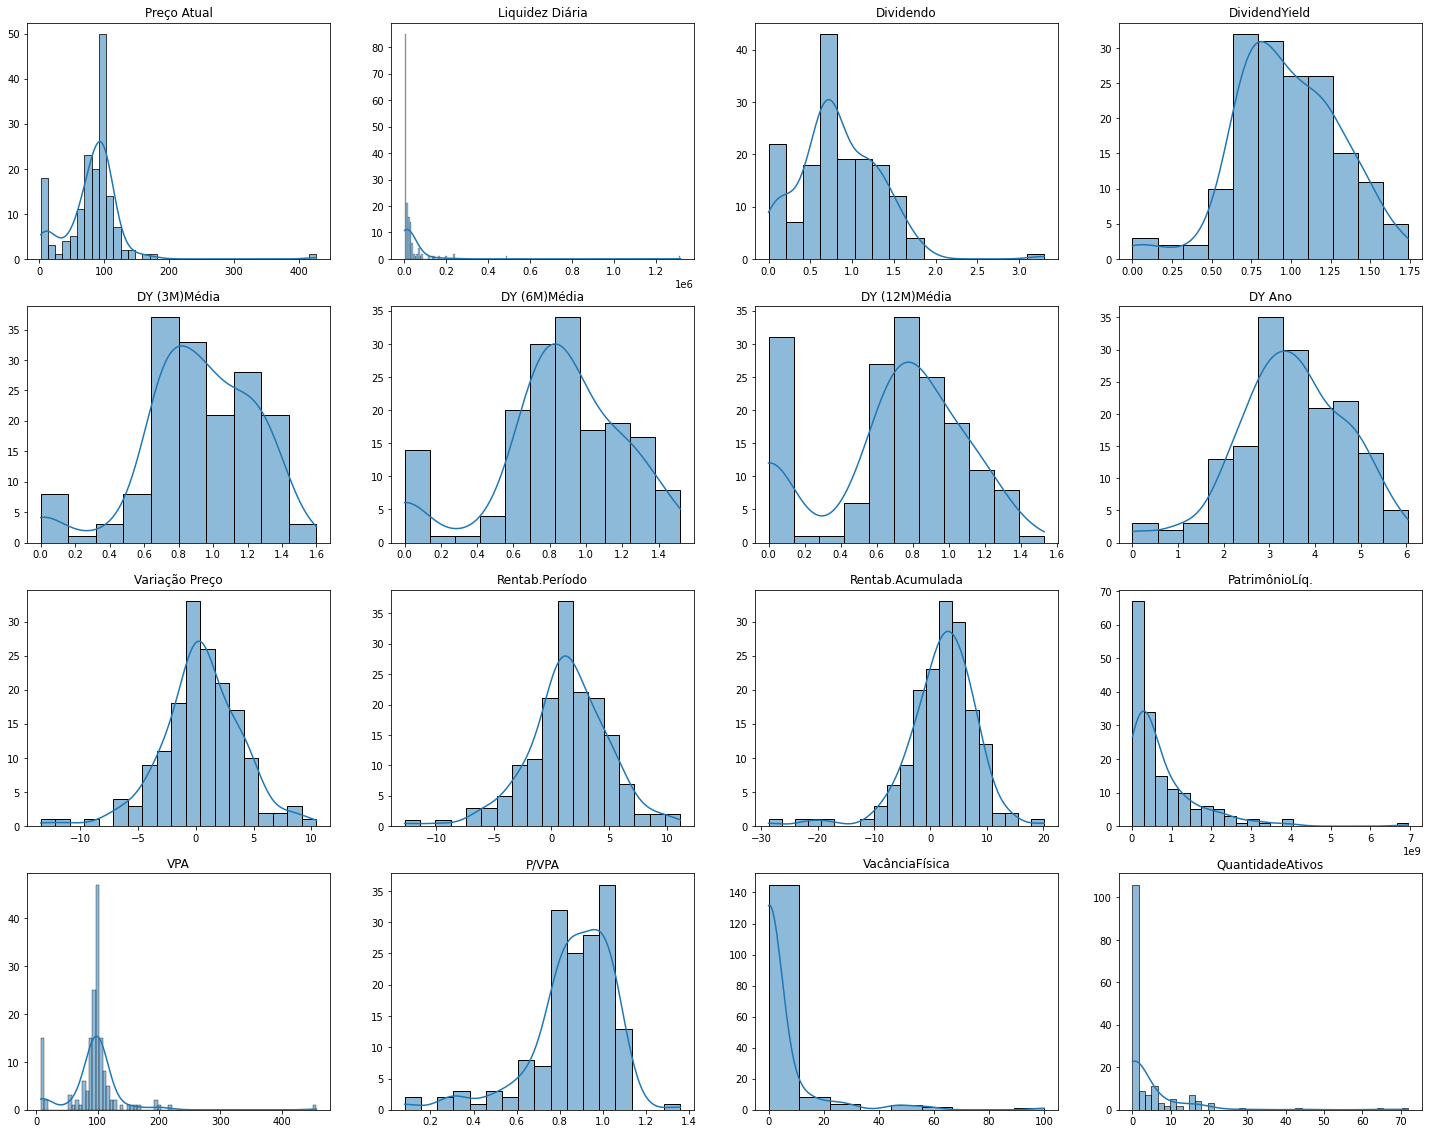

In [ ]:
#plot dos histogramas

plt.figure(figsize=(25,20))

for i in range(1,17):
  ax = plt.subplot(4,4,i)
  sns.histplot(data = df.iloc[:,i], kde = True)
  ax.set_title(df.columns[i])
  ax.set_xlabel("")
  ax.set_ylabel('')

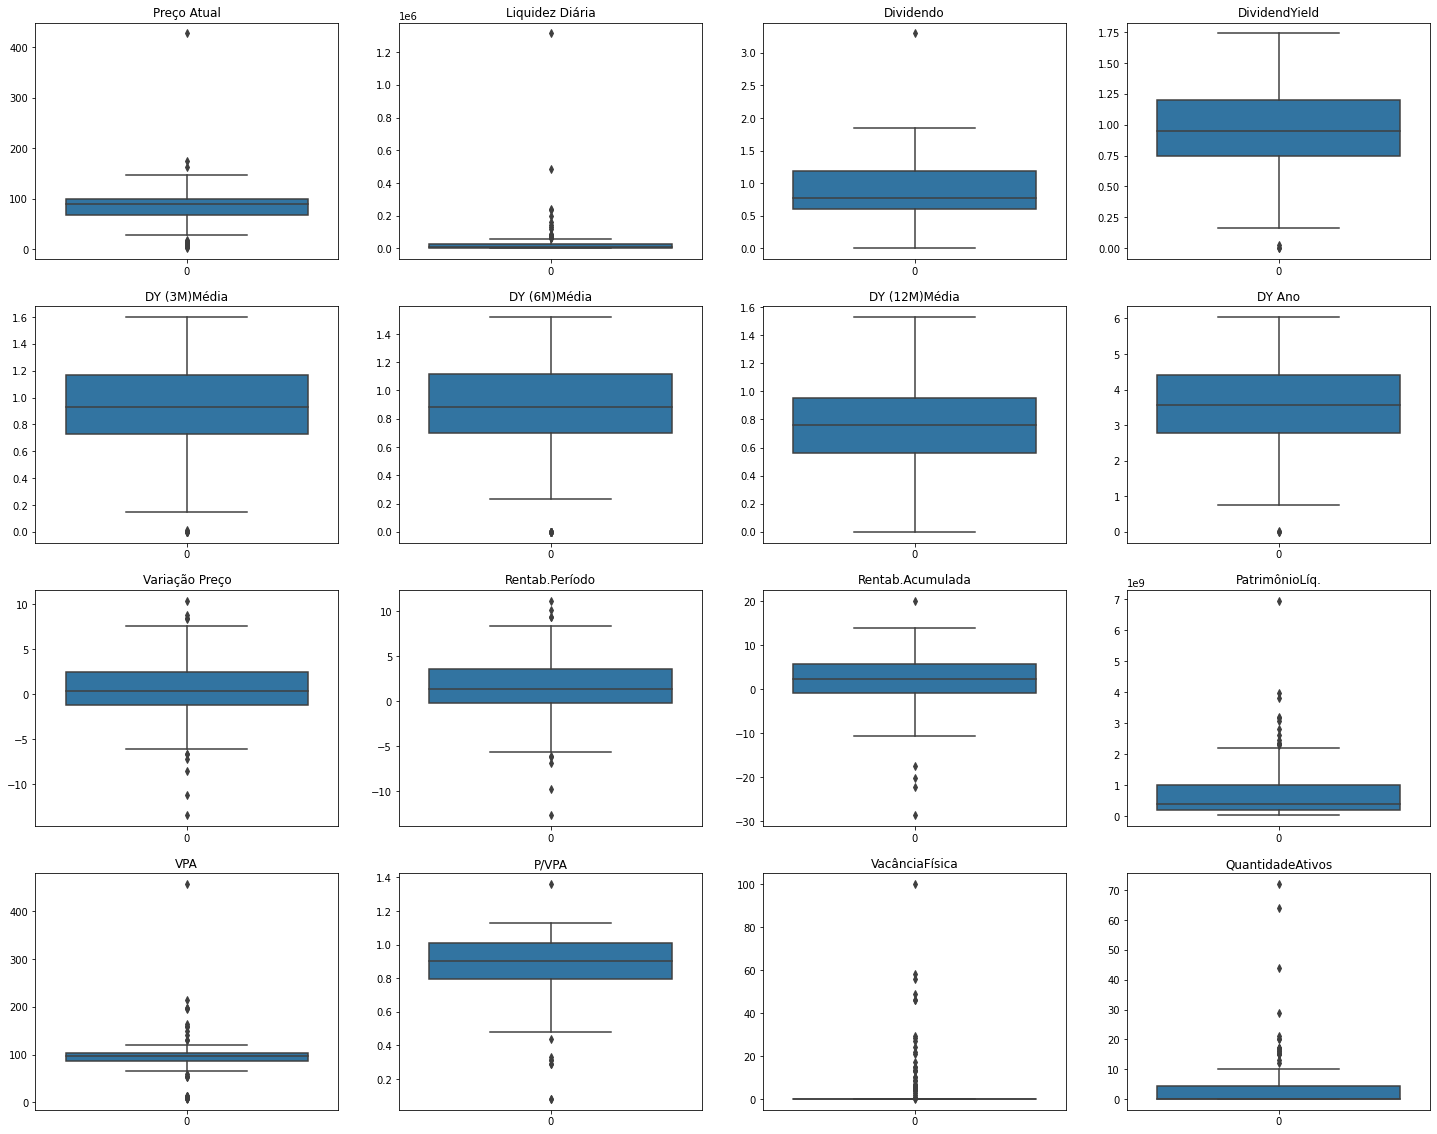

In [ ]:
#plot dos boxplots

plt.figure(figsize=(25,20))

for i in range(1,17):
  ax = plt.subplot(4,4,i)
  sns.boxplot(data = df.iloc[:,i])
  ax.set_title(df.columns[i])
  ax.set_xlabel("")
  ax.set_ylabel('')
  #ax.legend(df.columns[i].describe())

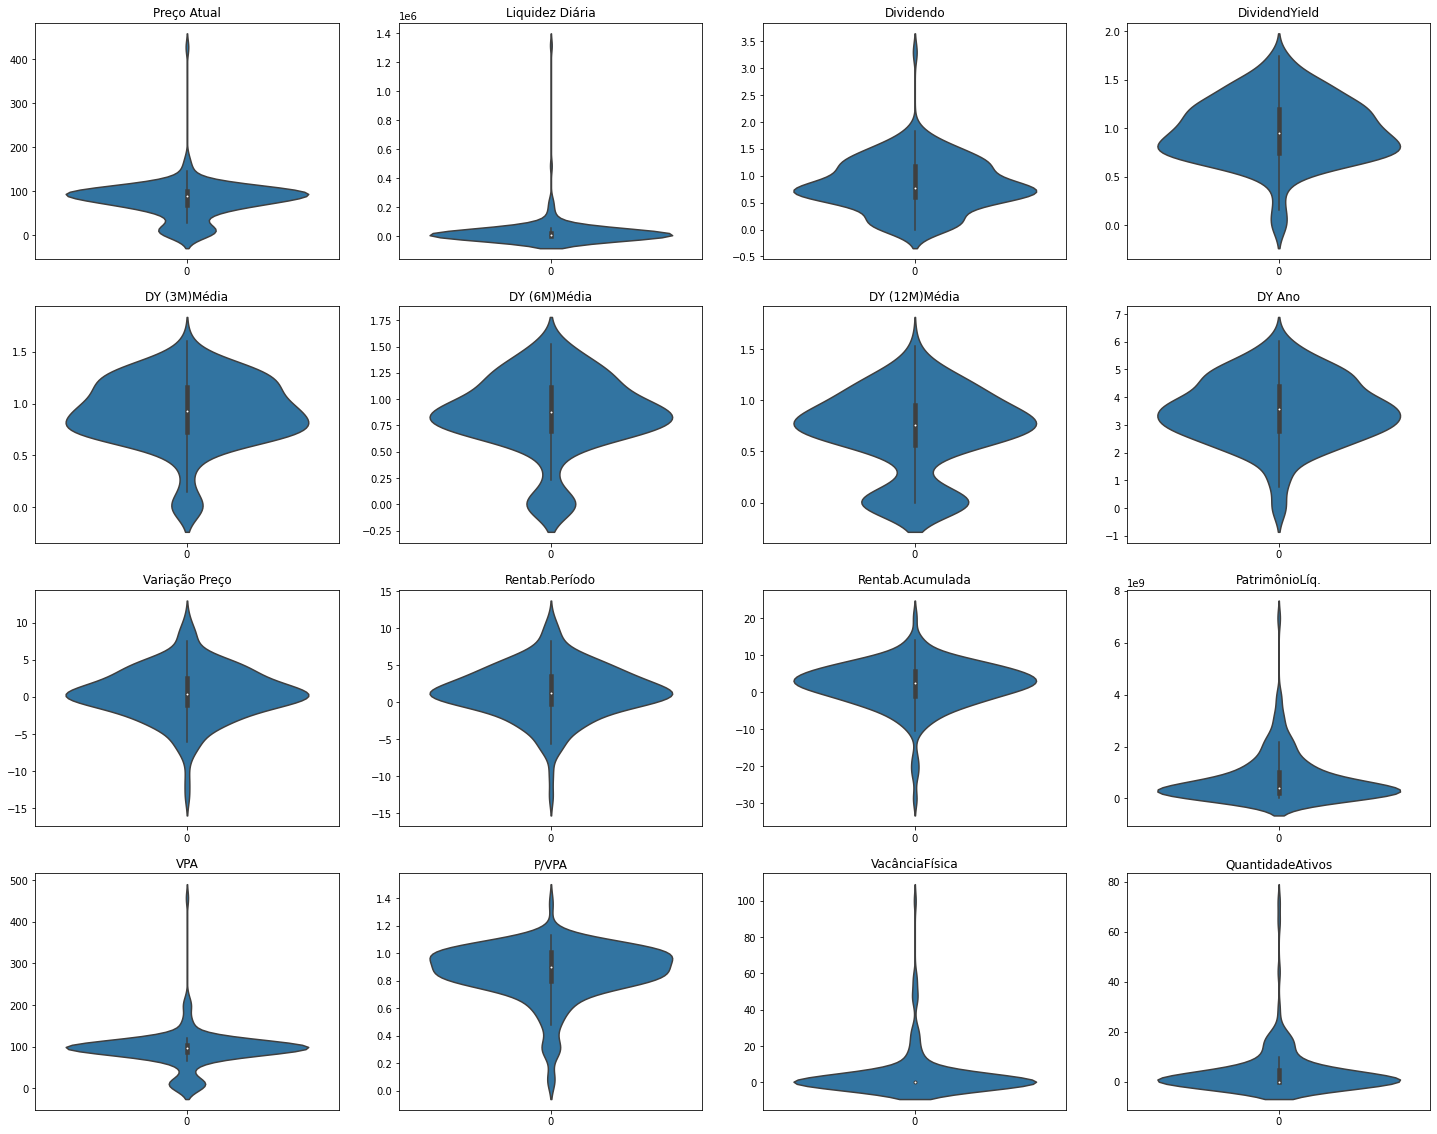

In [ ]:
#plot dos violinplots

plt.figure(figsize=(25,20))

for i in range(1,17):
  ax = plt.subplot(4,4,i)
  sns.violinplot(data = df.iloc[:,i])
  ax.set_title(df.columns[i])
  ax.set_xlabel("")
  ax.set_ylabel('')

Percebe-se que esse período houve uma normalização pós fase crítica da pandemia.
As variáveis Variação Preço, DividendYield e DY Ano com grande concentração na média dos valores.

O DY anual da maior parte dos fundos fica entre 2 e 5%, indicando que fundos com valores acima disso se sobressaem. 

Uma análise interesssante é o confrontamento do DY ano com DY 12 meses. Essa análise mostra um aumento entre de DY entre todos os fundos, CERTAMENTE decorrente da melhoria de toda conjuntura pós pandemia.

Pouco mais da metade dos fundos não possuem ativos físicos, o que é coerente visto a alta quantidade de ativos da modalidade "Títulos e Valores Imobiliários", "Híbridos" e "Outros". Visto que os títulos sem ativos foram considerados com 0% de vacância física, isso também reflete numa baixa mediana do atributo.

Quanto ao P/VPA, observa-se que a maioria dos FIIs estão sendo negociados abaixo do seu valor patrimonial ou muito próximo do valor patrimonial, o que é um indicativo de que os fundos estão baratos.

##Análise Multivariável

In [ ]:
cols = ["Setor","Preço Atual", "Liquidez Diária", "DY Ano", "Variação Preço", "Rentab.Acumulada", "P/VPA", "VacânciaFísica"]

Análise entre a variável Setor e as variáveis: Preço Atual, Liquidez Diária, DY Ano, Variação Preço, Rentab.Acumulada, P/VPA e VacânciaFísica, para mostrar visualmente como estão distribuidas as variáveis analisadas, categorizando por setor.

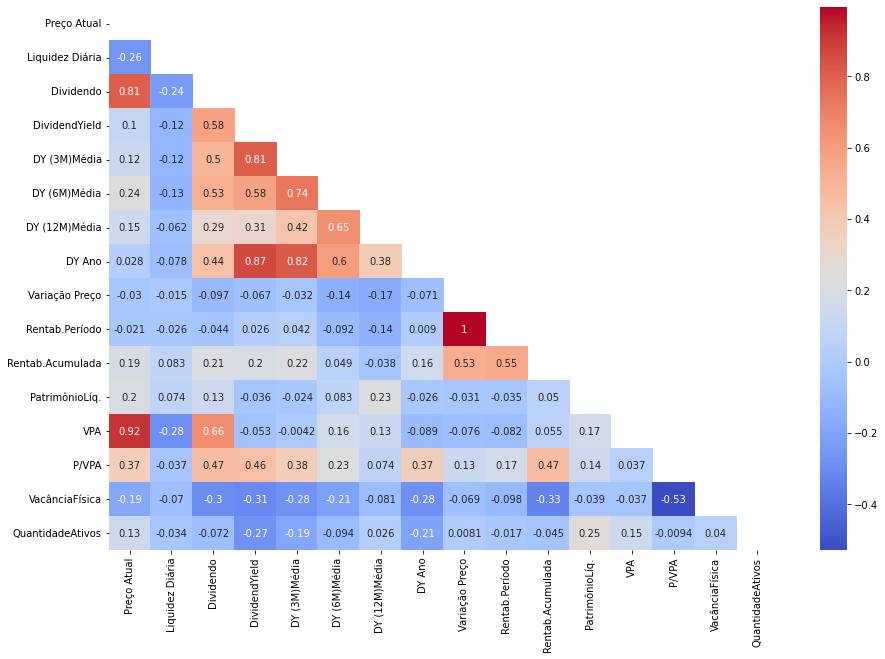

In [ ]:
figure = plt.figure(figsize=(15,10))

corr = df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr,mask = mask, annot = True, cmap='coolwarm')

Podemos destacar, diante do gráfico de correlação, a grande correlação entre:


*   DividendYield X Preço Atual
*   VPA x Preço Atual
*   DividendYield x DY Ano
*   DividendYield x DY 3M Média
*   DY 3M Média x DY Ano
*   DY 3M Média x DY 6M Média
*   Variação Preço x Rentab Acumulada


A análise a seguir é entre a variável Setor e as variáveis: Preço Atual, Liquidez Diária, DY Ano, Variação Preço, Rentab.Acumulada, P/VPA e VacânciaFísica, para mostrar visualmente como estão distribuidas as variáveis analisadas, categorizando por setor.

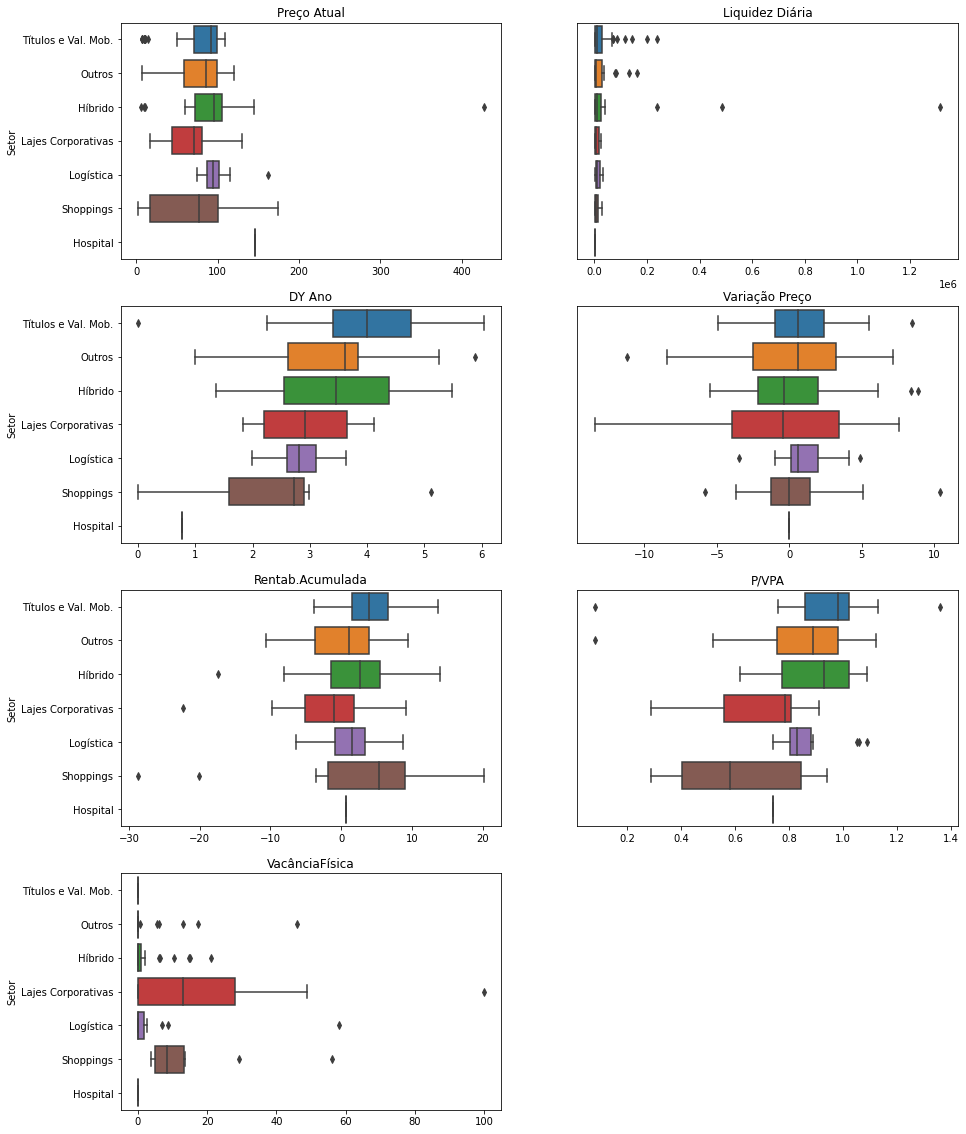

In [ ]:
plt.figure(figsize=(15,20))

for i in range(1,len(cols)):
  ax = plt.subplot(4,2,i)
  sns.boxplot(x = df[cols[i]], y = df.Setor)
  ax.set_title(cols[i])
  ax.set_xlabel('')
  if i % 2 == 0:
    ax.set_ylabel('')
    ax.set_yticks([])

Preço atual: Com relação aos preços de fundos, percebe-se que os
os valores estão com a mediana próxima do terceiro quartil.
Os preços dos FIIs de Shoppings são os que mostraram uma maior variação entre
os quartis, no entanto os quartis desse setor estão mais próximo do valor 
mínimo desses ativos.

 
DY Ano: Percebe-se um DY entre 2% e 3% para todos os ativos, de todos os setores.

Variação Preço: Percebe-se a mediana dos preços todas elas próximas de zero, 
levando a crer que neste período a variação foi muito baixa nos preços,
talvez por uma realocação de investimentos.

Rentab. Acumulada: Percebe-se a  mediana muito próxima de zero entre todos os setores,
mostrando que até o momento a rentabilidade não se encontrava num patamar favorável 
aos cotistas, os FIIs estão até o momento sendo um investimento com baixa 
rentabilidade (valorização das cotas)


P/VPA: Percebe-se que a grande maioria dos FIIs estão sendo negociados
abaixo do seu valor patrimônial (abaixo de 1), ou seja, representando um ótimo
momento de investimento nos FIIs.
 
 
 
 Considerações Gerais:
 O setor de Logística é o que apresenta menos variações entre os valores máximos
 e mínimos, poderia se dizer que é o setor menos volátil e mais "conservador".


# 3. Análise das FIIs em 2019

Os processos e aplicações desta parte são idênticas a etapa passada, portanto, definimos a base que será trabalhada e visualizamos, de forma sucinta, os dados presentes nela, em seguida partimos para a análise univariável e multivariável. O que irá diferenciá-las é justamente o maior contexto que, após analisarmos a base anterior, de forma com que ela auxilie e talvez nos faça encontrar informações que só podiam ser encontradas após a análise a partir de outro contexto (no nosso caso, o contexto anterior são as FIIs em 2022 e o contexto atual são as FIIs em 2019).

In [ ]:
url2 = 'https://raw.githubusercontent.com/lazs/tcc_pucmg/main/FIIs-2019v2.csv'
#data2 = pd.read_csv(url2, encoding = "ISO-8859-1", decimal=',', on_bad_lines="skip", sep=";")



#url2 = 'https://raw.githubusercontent.com/lazs/tcc_pucmg/main/CSV_EDA_2019.csv'
data2 = pd.read_csv(url2)
df2 = pd.DataFrame(data2)
df2.head()

,Código do fundo,Setor,Preço Atual,Liquidez Diária,Dividendo,DividendYield,DY (3M)Média,DY (6M)Média,DY (12M)Média,DY Ano,Variação Preço,Rentab.Período,Rentab.Acumulada,PatrimônioLíq.,VPA,P/VPA,VacânciaFísica,QuantidadeAtivos
0,ABCP11,Shoppings,94.35,4727.0,0.1300,0.6937,0.5843,0.5517,0.5376,0.6937,0.0000,0.6937,0.6937,9.074805e+08,14.87,634.41,1.200,1
1,AGCX11,Outros,1190.01,231.0,7.5000,0.6303,0.6057,0.6483,0.6364,0.6303,0.0000,0.6303,0.6303,4.324066e+08,1067.67,111.46,5.715,41
2,ALZR11,Outros,98.29,3911.0,0.6555,0.6622,0.6880,0.6914,0.6488,7.7861,5.2979,5.9952,3.3298,9.710990e+07,97.40,100.92,0.000,2
3,ATSA11,Shoppings,113.99,0.0,0.1000,0.0998,0.1861,0.1251,0.1224,0.0998,0.0000,0.0998,0.0998,1.849389e+08,107.82,105.72,22.300,1
4,BBFI11B,Lajes Corporativas,2283.97,205.0,25.7775,1.0790,1.1419,1.2206,1.0797,1.0790,0.0000,1.0790,1.0790,3.511548e+08,2701.19,84.55,38.590,2


In [ ]:
df2.set_index('Código do fundo', inplace = True)

In [ ]:
df2['P/VPA'] = df2['P/VPA'].div(100)
#df

In [ ]:
#Impondo um limite de análise de NO MÍNIMO 1000 negociações dárias
df2 = df2[df2['Liquidez Diária'] >= 1000]

In [ ]:
df2.dtypes

Setor                object
Preço Atual         float64
Liquidez Diária     float64
Dividendo           float64
DividendYield       float64
DY (3M)Média        float64
DY (6M)Média        float64
DY (12M)Média       float64
DY Ano              float64
Variação Preço      float64
Rentab.Período      float64
Rentab.Acumulada    float64
PatrimônioLíq.      float64
VPA                 float64
P/VPA               float64
VacânciaFísica      float64
QuantidadeAtivos      int64
dtype: object

## Dados categóricos

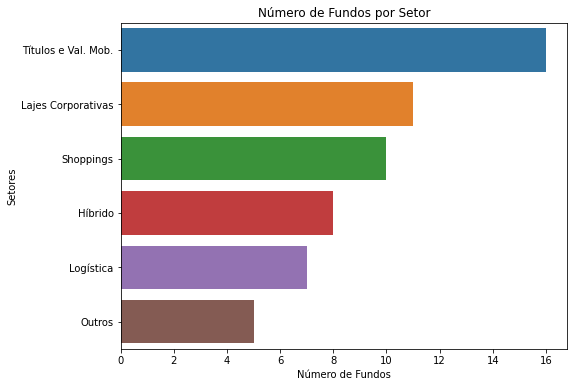

In [ ]:
plt.figure(figsize = (8,6))
ax = sns.countplot(y='Setor', 
              data = df2, 
              order = df2.Setor.value_counts(ascending = False).index)

ax.set_title('Número de Fundos por Setor')
plt.xlabel('Número de Fundos')
plt.ylabel('Setores')
plt.show()

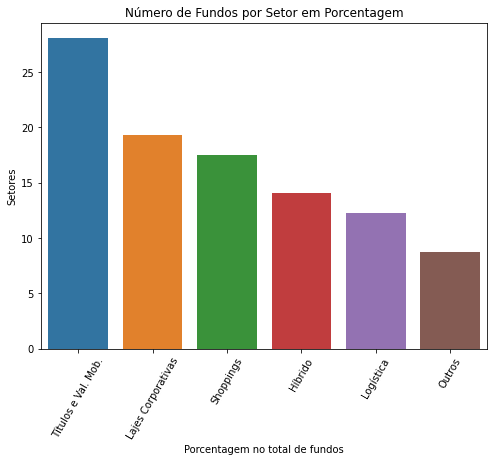

In [ ]:
setor_norm = df2.Setor.value_counts(normalize = True)

plt.figure(figsize = (8,6))
ax = sns.barplot(x = setor_norm.index,
                   y = setor_norm.values * 100)

ax.set_title('Número de Fundos por Setor em Porcentagem')
plt.xlabel('Porcentagem no total de fundos')
plt.ylabel('Setores')
plt.xticks(rotation = 60)
plt.show()

Percebemos mudanças significativas quando comparamos o gráfico de 2019 com o atual, tanto na proporção, onde os títulos não possuem uma discrepância tão grande com relação aos outros setores. 
Vemos claramente uma proporção próxima entre os títulos com as lajes coorporativas em comparação com o ano de 2022. Essa mudança de proporção se deu pelo pela grande procura por emissões de crédito no mercado imobiliário, e isso fez com que mais FIIs papel surgissem.  

## Variáveis Numéricas

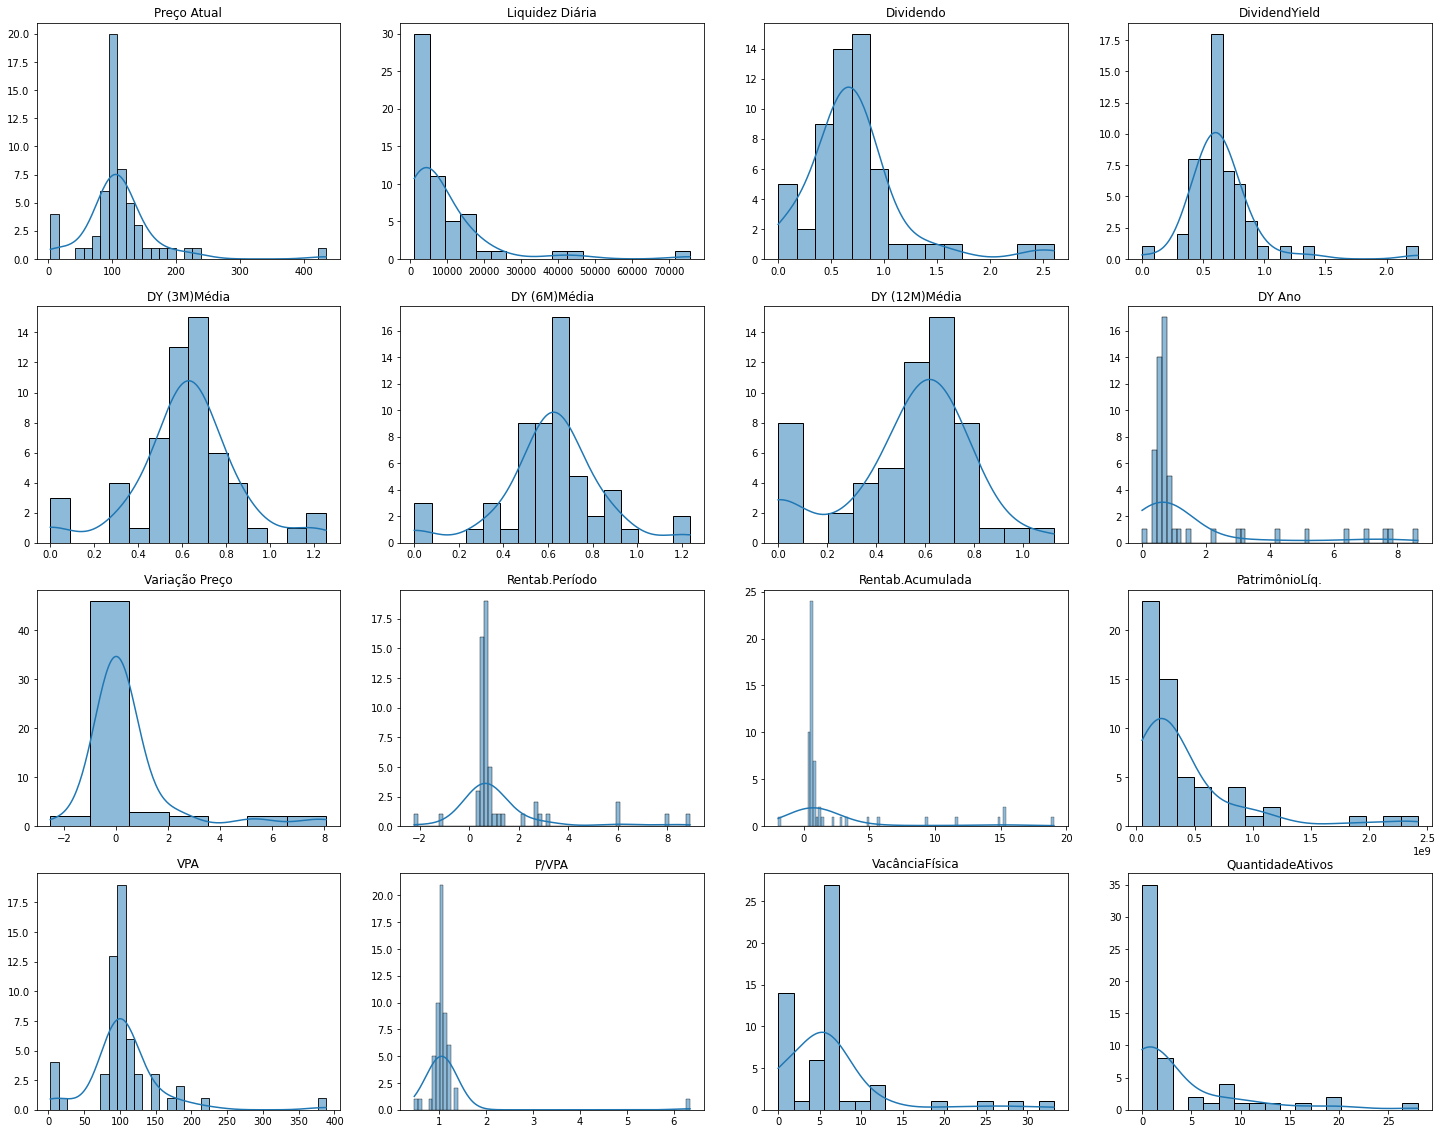

In [ ]:
#plot dos histogramas

plt.figure(figsize=(25,20))

for i in range(1,17):
  ax = plt.subplot(4,4,i)
  sns.histplot(data = df2.iloc[:,i], kde = True)
  ax.set_title(df2.columns[i])
  ax.set_xlabel("")
  ax.set_ylabel('')


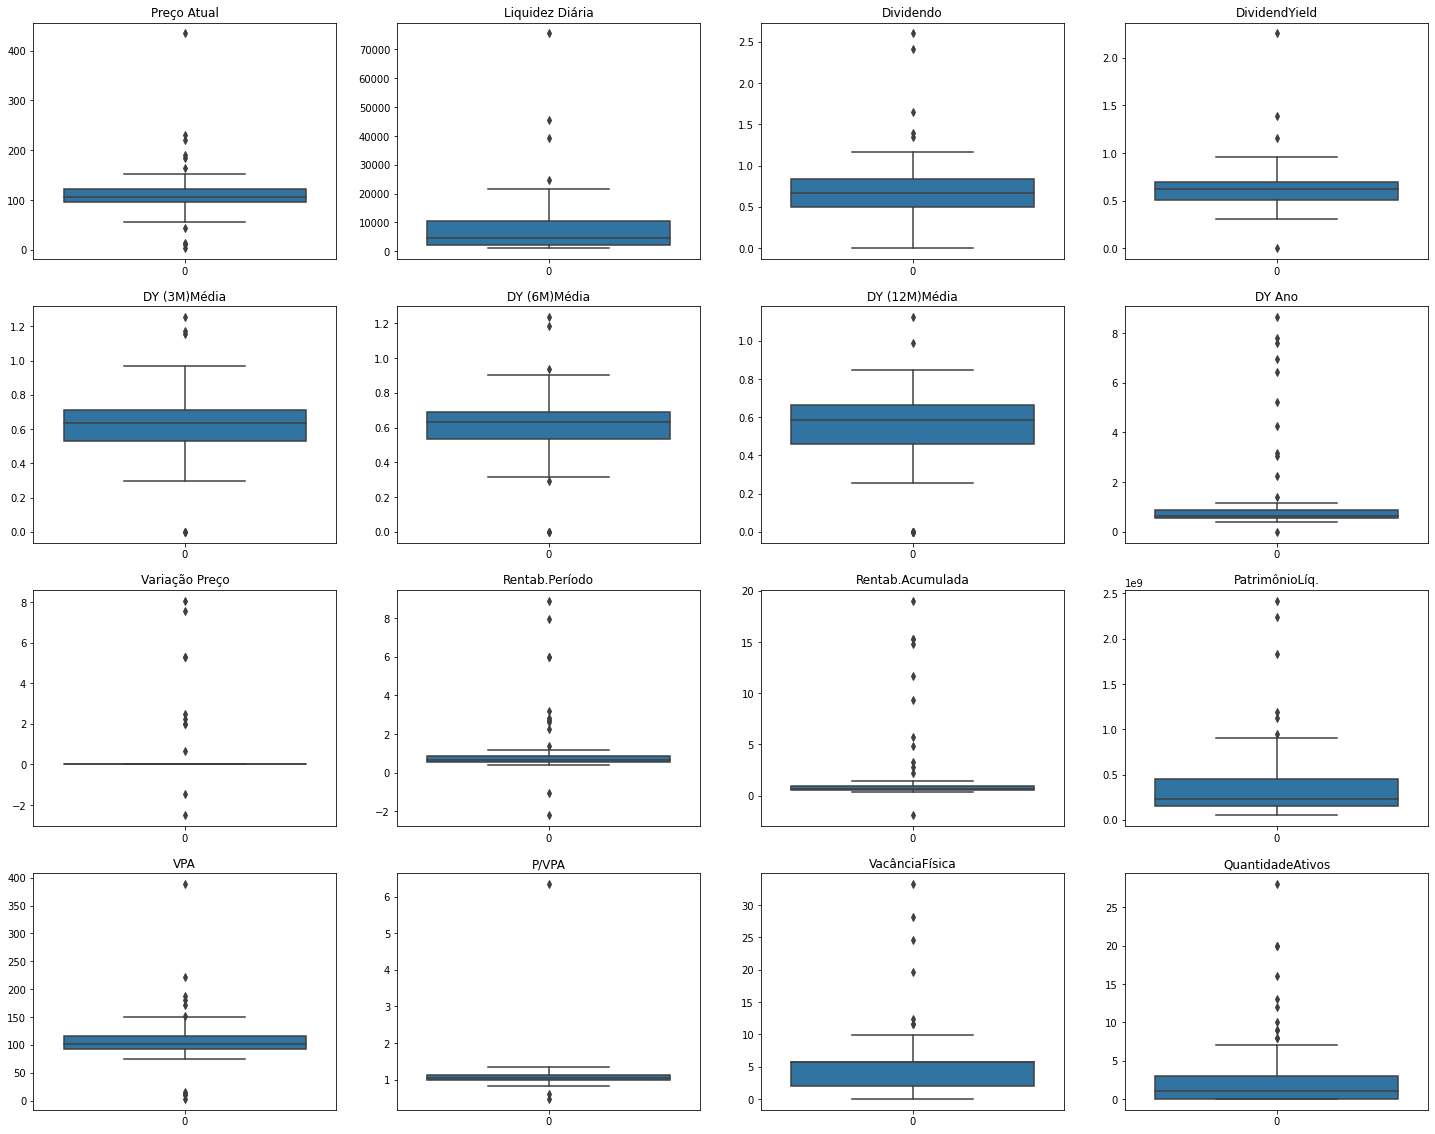

In [ ]:
#plot dos boxplots

plt.figure(figsize=(25,20))

for i in range(1,17):
  ax = plt.subplot(4,4,i)
  sns.boxplot(data = df2.iloc[:,i])
  ax.set_title(df2.columns[i])
  ax.set_xlabel("")
  ax.set_ylabel('')
  #ax.legend(df2.columns[i].describe())

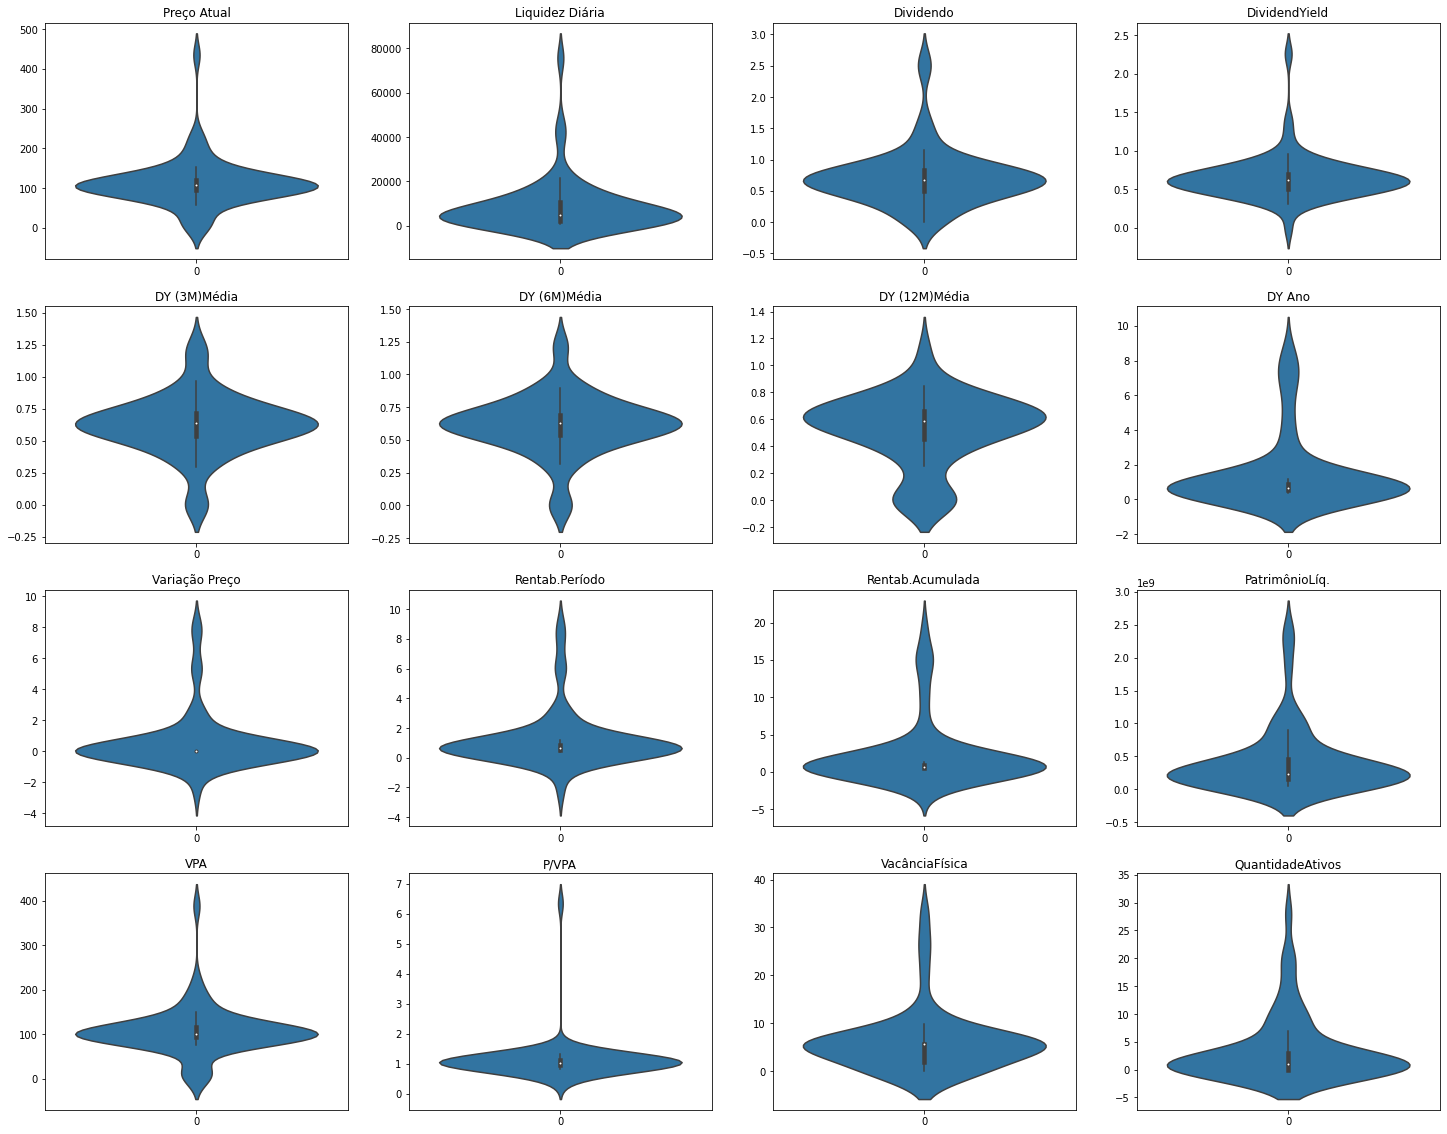

In [ ]:
#plot dos violinplots

plt.figure(figsize=(25,20))

for i in range(1,17):
  ax = plt.subplot(4,4,i)
  sns.violinplot(data = df2.iloc[:,i])
  ax.set_title(df2.columns[i])
  ax.set_xlabel("")
  ax.set_ylabel('')

## Análise Multivariável

In [ ]:
cols2 = ["Setor","Preço Atual", "Liquidez Diária", "DY Ano", "Variação Preço", "Rentab.Acumulada", "P/VPA", "VacânciaFísica"]

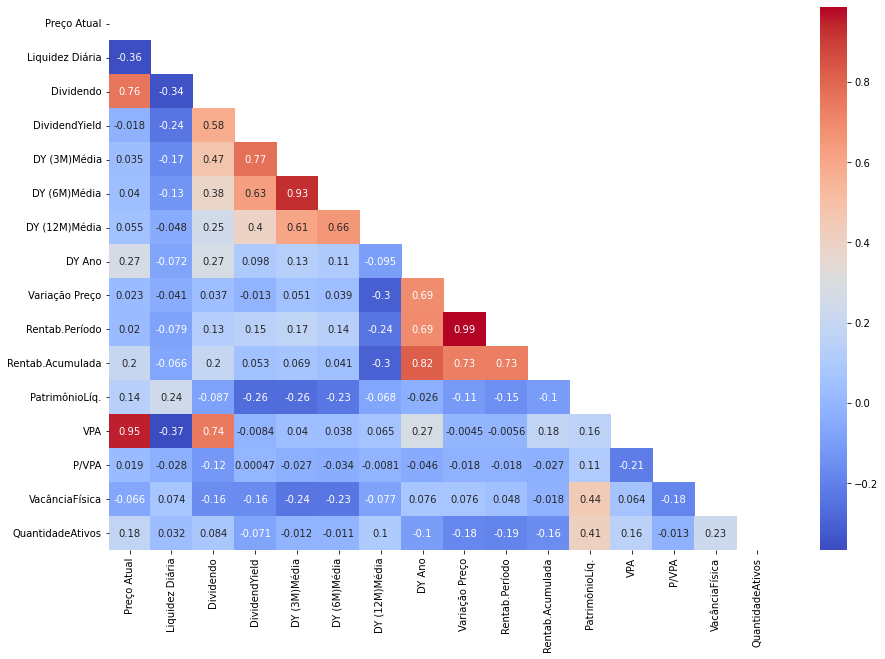

In [ ]:
figure = plt.figure(figsize=(15,10))

corr = df2.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr,mask = mask, annot = True, cmap='coolwarm')

O mapa de correlação entre as colunas possuíam valores de correlação menores, quanto comparamos com o mapa atual, provavelmente pela situação financeira diferente que estavam submetidos pré pandemia.

Temos correlações altas nas mesmas situações encontradas no mapa atual, no entanto.

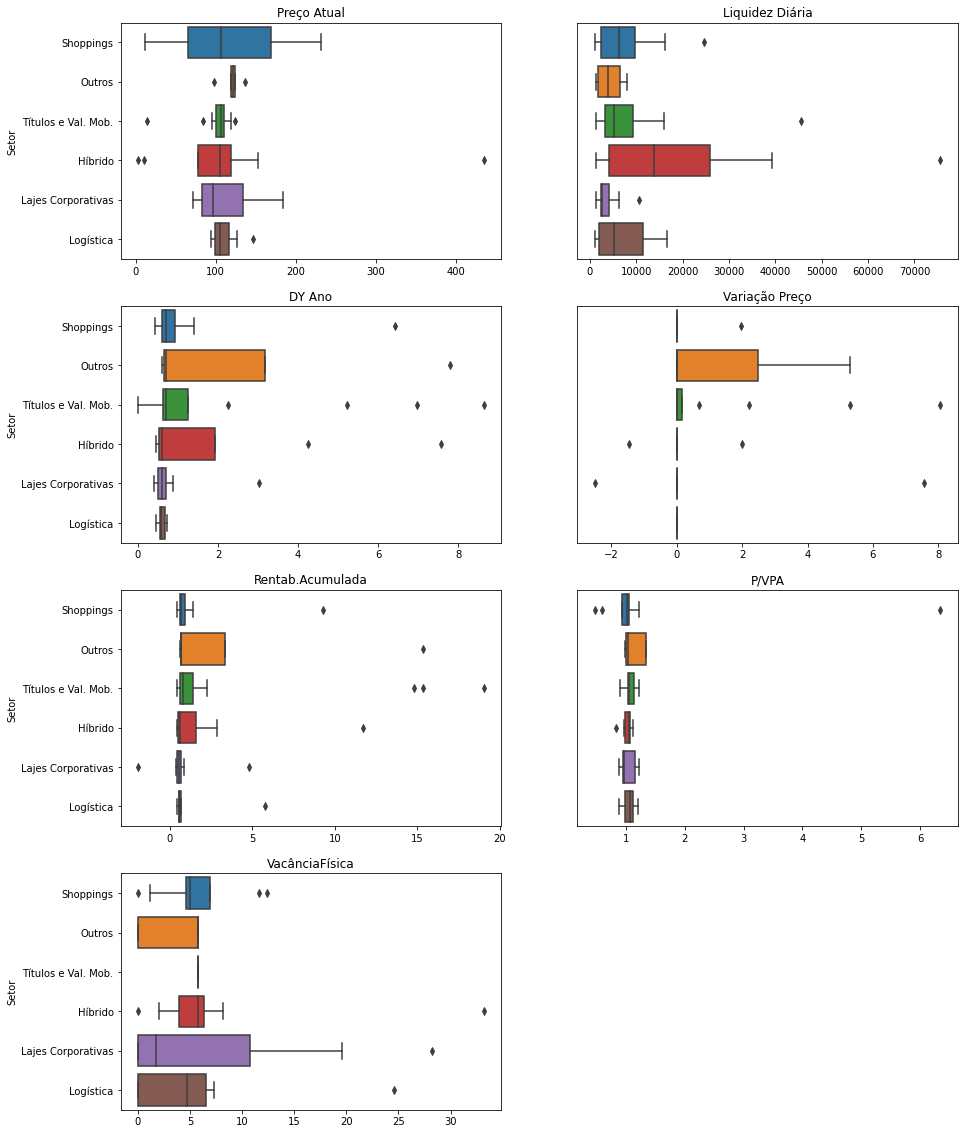

In [ ]:
plt.figure(figsize=(15,20))

for i in range(1,len(cols2)):
  ax = plt.subplot(4,2,i)
  sns.boxplot(x = df2[cols2[i]], y = df2.Setor)
  ax.set_title(cols2[i])
  ax.set_xlabel('')
  if i % 2 == 0:
    ax.set_ylabel('')
    ax.set_yticks([])

Uma diferença que pode ser vista quando
comparamos os boxplots de 2019 vs atual, é na variável Preço Atual.
o valor dos fundos em 2019 são mais caros que o atual. 
Mostrando que o mercado dos FIIs ainda não voltou ao patarmar de 2019.

Temos praticamente todos os setores com valores positivos
para a variação preço onde, na situação atual, a gigante maioria
está negativa ou próxima de zero. 

A liquidez diária foi semelhante, apenas houve uma mudança de escala na análise.

O DY Ano de 2019 mostra uma ditribuição mais centradas em 1%, já em 2022 
o percentual está mais amplo, "abrindo" mais a escala, mostrando que hoje
há mais valores de DY sendo praticados.


A Rentabilidade Acumulada  mostram valores positivos para
a situação das FIIs em 2019, enquanto, atualmente, ainda existem 
FIIs com rentabilidade negativa.

O P/VPA possui uma diferença muito grande,os valores de 2019 estavam 
todos muitíssimos próximos de 1, ou seja, sem ágil (o ativo sendo 
negociado na bolsa por um valor acima de que vale seu patrimônio), comparado
com hoje, 2022.



# 4. Análise Comparativa de 2022 vs 2019

Para esta etapa, criaremos variáveis que representam a interseção das FIIs de 2019 e 2022. Desta forma, podemos acompanhar, exclusivamente, as FIIs que estavam no mercado em 2019 e o que ocorreu com elas em 2022 de forma mais específica que as abordagens anteriores.

In [ ]:
#cria lista com index das empresas presentes em 2019 e 2022
empresas_2019 = list(df2.index)
empresas_2021 = list(df.index)

print(len(empresas_2019))
print(len(empresas_2021))

empresas = [empresa for empresa in empresas_2019 if empresa in empresas_2021]
print(len(empresas))

57
163
42


In [ ]:
df_empresas = df.loc[empresas]

df2_empresas = df2.loc[empresas]


## Visualização dos dados

Neste, abordaremos a problemática da seguinte forma:



1.   Análise comparativa dos FIIs em 2019 vs 2022
2.   Análise de variação dos FIIs em 2019 vs 2022

Para o primeiro passo, utilizaremos o conhecimento de matriz transposta para visualizarmos os dados com os FIIs no eixo x e o valor correspondente deste fundo (dada a coluna que foi representada graficamente) no eixo y. Outra informação importante é quanto a legenda destes gráficos, portanto, o comportamento representado com a cor <font color='orange'>laranja</font> são os valores presentes na base de **2019** e, com a cor <font color='blue'>azul</font>, os valores na base de **2022**. 



### Dividend Yield

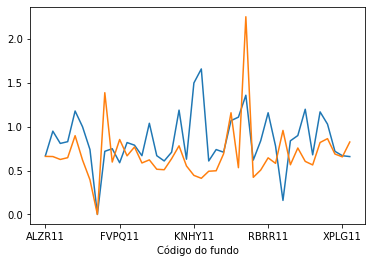

In [ ]:
plot_df = df_empresas
plot_df2 = df2_empresas

#Remoção da coluna Setor para poder mostrar as bases transpostas para análise das FIIs (dado que não dá para criar a transposta de um dado não-numérico)
#plot_df.drop(columns='Setor', axis = 1, inplace = True)
#plot_df2.drop(columns='Setor', axis = 1, inplace = True)

ax = plot_df['DividendYield'].T.plot()
plot_df2['DividendYield'].T.plot(ax=ax)

O Dividend Yield é a métrica mais conhecida pelo grande público para análise de um fundo, apesar de ser um ERRO uma análise puramente pelo DY.
Podemos observar que, apesar de alguns fundos estarem próximos do valor que tinham em 2019, vemos ainda algumas distorções de valores, mas é algo que deve tender a se sobrepor ao longo do tempo.

### Variação de Preço

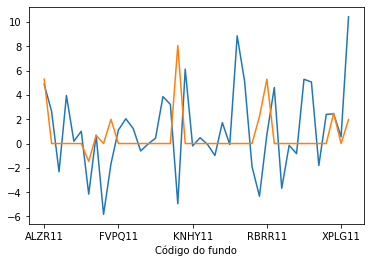

In [ ]:
ax = plot_df['Variação Preço'].T.plot()
plot_df2['Variação Preço'].T.plot(ax=ax)

Em questão da variação de preço, a estabilidade destes é relevante para os investidores mais conservadores e podem considerar esta uma característica atraente. No entanto, a estabilidade foi perdida, para estes fundos, quando olhamos a situação destes em 2022. Não só a variação não estabilizou em zero como há um declínio nas curvas de variação de preço, mostrando a perca de valor destes, quando comparados com 2019.

### Rentabilidade Acumulada

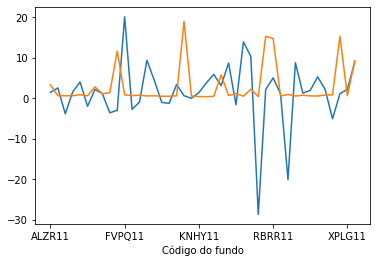

In [ ]:
ax = plot_df['Rentab.Acumulada'].T.plot()
plot_df2['Rentab.Acumulada'].T.plot(ax=ax)

A rentabilidade acumulada é o que podemos esperar de retorno do fundo investido e, como pode ser visto. O gráfico mostra que há fundos com rentabilidade negativa, mostrando que ainda há fundos que não se recuperaram pós período de pandemia.

### P/VPA

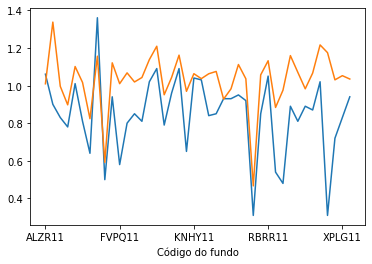

In [ ]:
ax = plot_df['P/VPA'].T.plot()
plot_df2['P/VPA'].T.plot(ax=ax)

O P/VPA de 2022 mostra um gráfico "desencaixado" para baixo da curva de 2019, algo que mostra que houve uma desvalorização de 2019 a 2022.
O gráfico de 2022 mostra que os valores de P/VPA de 20222 ainda estão abaixo, na média com relação a 2019

### Preço Atual

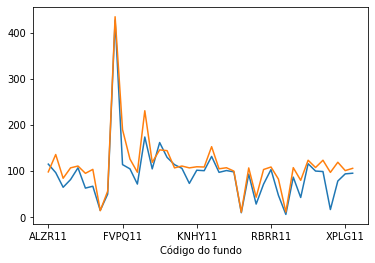

In [ ]:
ax = plot_df['Preço Atual'].T.plot()
plot_df2['Preço Atual'].T.plot(ax=ax)

Os gráficos dos preços relativos a 2019 e 2022 dos ativos analisados paracem 
estar se "encaixando", mostrando uma volta aos preços praticados 2019.

# 5. Conclusão



É inegável a influência da situação atual vivida pelo país estaria representada em várias alçadas de investimento nacionais e isso não foi diferente para os FIIs. 
Temos um momento de clara retomada de valores presentes nos FIIs



# 6. Referências Bibliográficas




1.   CHAVES, Ana Clara. et al. Título: Análise exploratória das inscrições no processo seletivo da TAIL 2020.Acesso em: 26 de Mai. de 2022.


2.   PERRUCHO, Breno (Canal Jovem de Negócios). Como escolher o MELHOR FUNDO IMOBILIÁRIO (FII) da BOLSA DE VALORES. Youtube, 14 de Jan. de 2019. Disponível em: <https://www.youtube.com/watch?v=VUwU9wt2s7w&t=723s&ab_channel=JovensdeNeg%C3%B3cios>. Acesso em: 5 de Mai. de 2022.